# Single cell response to step versus ramp input
### 1. Overview
Whether single *Dictyostelium* cells display an intracellular cAMP spike depends on the rate at which the input is applied (Figure 3, below). In this notebook we are going to explore different models's ability to reproduce this behavior. With this notebook, you can play with different $cAMP_{e}$ inputs as well as the rate at which the input is applied, and compare the simulated responses ($cAMP_{i}$) produced by different models. The default ramp input is matched with the shape of the input used in experiments (Figure 3A).
![Figure 3](SC_step_ramp_1.png)
<h5><center>Figure3</center></h5>

#### Let's start by importing packages and setting up time scaling parameters

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import scipy.io

from Gregor2010_agent_and_pop_FUN import  Gregor2010_agent
from Sgro2015_agent_and_pop_FUN import Sgro2015_agent
from Goldbeter1987_agent_and_pop_FUN import Goldbeter1987_agent_3var
from MaedaLoomis2004_agent_and_pop_FUN import MaedaLoomis2004_agent
from Kamino2017_agent_and_pop_FUN import Kamino2017_agent 

from NB_SC_functions import * 
from NormParam import *

### 2. Experimental data 
#### import and plot experimental data

C:\Users\ellin\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


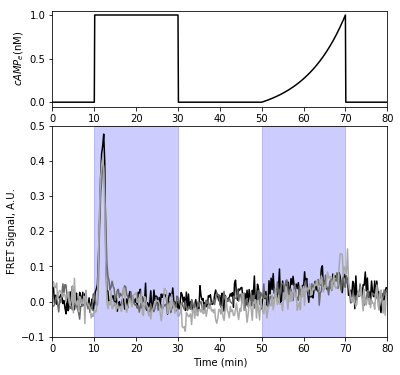

In [2]:
my_dir = r'C:/Users/ellin/Dropbox/AACP Science/Dicty model review drafts/figures/'
Sgro2015Figure3excel = pd.read_excel(my_dir+r'Sgro2015DataFormattedforPython.xlsx',sheetname='Figure3')

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(3, 1)
ax0 = fig.add_subplot(grid[0, 0])
ax0.plot(Sgro2015Figure3excel["Ramp Input (min Time)"],Sgro2015Figure3excel["Ramp Input (nM cAMP)"],color='k')
ax0.set_ylabel(r'$cAMP_{e}$(nM)')
ax0.set_xlabel('Time, A.U.')
ax0.set_xlim([0,80])

ax1= fig.add_subplot(grid[1:, 0])
ax1.plot(Sgro2015Figure3excel["Cell Trace Time (min)"],Sgro2015Figure3excel["Cell 1 FRET Trace"],color='k')
ax1.plot(Sgro2015Figure3excel["Cell Trace Time (min)"],Sgro2015Figure3excel["Cell 2 FRET Trace"],color='dimgrey')
ax1.plot(Sgro2015Figure3excel["Cell Trace Time (min)"],Sgro2015Figure3excel["Cell 3 FRET Trace"],color='darkgrey')
ax1.axvspan(10, 30, alpha=0.2, color='b'); ax1.axvspan(50, 70, alpha=0.2, color='b')
ax1.set_ylabel('FRET Signal, A.U.')
ax1.set_xlabel('Time (min)')
ax1.tick_params(axis='both', which='major')
ax1.set_ylim([-0.1,0.5]); ax1.set_xlim([0,80])
plt.show()

### 3. Matiel 1986
#### Set up parameters (from Table II in [Matiel & Goldbeter 1986](https://www.sciencedirect.com/science/article/pii/S0006349587832757?via%3Dihub) )

In [4]:
k1 = 0.036     # per min
k2 = 0.666    # per min
L1 = 10; L2 = 0.005 
c = 10;           # 0.15 ~ 50
lamda = 0.01; theta = 0.01; e =  1 ; q = 4000; sig= 0.6
v = 12; k = 4 # k prime in the paper
ki = 1.7; kt = 0.9; kc = 5.4; h = 5
Goldbeter3AgentParam={'k1':k1,'k2':k2,'L1':L1,'L2':L2, 'c':c, 'lamda':lamda,\
            'theta':theta, 'e':e, 'q':q,'sig':sig, 'v':v, 'k':k, \
            'ki':ki,'kt':kt, 'kc':kc,'h':h}

#### Define input trace

In [5]:
cAMP=1
T_tot = 16; T_tot = T_tot*Nt_Goldbeter
dt=0.001; t=list(np.arange(0,T_tot,dt))
# trace from 
Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]# np.linspace(0,20,num=1000) # t step 0.02
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Goldbeter
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = RampInput_Exp[~np.isnan(RampInput_Exp)]

Goldbeter_time = np.arange(0,16*Nt_Goldbeter,dt)
RampInput_Goldbeter= cAMP*np.interp(Goldbeter_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

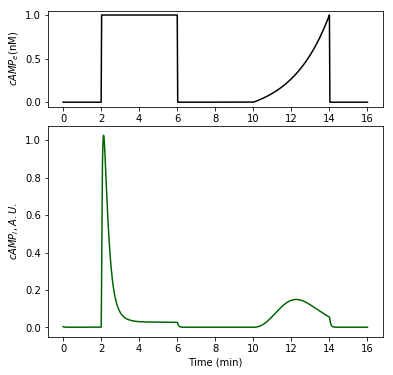

In [6]:
[t_plot_Goldbeter, b_trace, p_trace] = Goldbeter1986_SC(Goldbeter3AgentParam,dt,t,RampInput_Goldbeter)
t_plot_Goldbeter = t_plot_Goldbeter/(Nt_Goldbeter)

# Normalize height of cAMPi response trace to 1
b_trace = b_trace/Nh_Goldbeter

plot_SC_step_ramp(t_plot_Goldbeter, RampInput_Goldbeter, b_trace)


### 4. Maeda 2004
#### Set up parameters (from supplementary in [Maeda et al 2004](https://science.sciencemag.org/content/304/5672/875/tab-figures-data) )

In [7]:
k1=2.0; k2=0.9; k3=2.5; k4=1.5; k5=0.6
k6=0.8; k7=1.0; k8=1.3; k9=0.3; k10=0.8
k11=0.7; k12=4.9; k13=23; k14=4.5
MaedaAgentParam={'k1':k1,'k2':k2,'k3':k3,'k4':k4,'k5':k5,'k6':k6,\
            'k7':k7,'k8':k8,'k9':k9,'k10':k10,'k11':k11,'k12':k12,\
            'k13':k13,'k14':k14}

#### Define step input trace

In [8]:
cAMP=1
T_tot = 16 * Nt_Maeda
dt=0.001; t=list(np.arange(0,T_tot,dt))

Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]# np.linspace(0,20,num=1000) # t step 0.02
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Maeda
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = cAMP*RampInput_Exp[~np.isnan(RampInput_Exp)]

Maeda_time = np.arange(0,16*Nt_Maeda,dt)
RampInput_Maeda= np.interp(Maeda_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

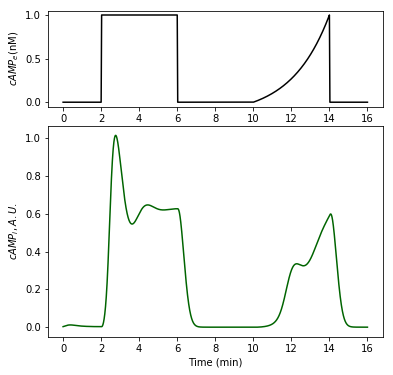

In [9]:
[t_plot_Maeda, cAMPi_trace, ERK2_trace] = Maeda2004_SC(MaedaAgentParam,dt,t,RampInput_Maeda)
t_plot_Maeda = np.array(t)/(Nt_Maeda)

# Normalize height of cAMPi response trace to 1
cAMPi_trace = cAMPi_trace/Nh_Maeda
plot_SC_step_ramp(t_plot_Maeda, RampInput_Maeda, cAMPi_trace)

### 5. Sgro 2015
#### Set up parameters

In [11]:
e=0.1 # excitability
sigma = 0.15 # noise strength
tauA=0.09; tauR=tauA/e; g=0.5
SgroAgentParam={'e':e,'tauA':tauA,'tauR':tauR,'g':g,'c0':1.2,'sigma':sigma,'N':100,\
            'a':0.058,'alpha0':800,'alpha_pde':1000,'Kd':1e-5,'S':1e6,\
            'Nt':27,'Na':3.5,'offset_A':1.5,'flux_thrs':0}

#### Define step input trace

In [12]:
cAMP=1
T_tot = 16; T_tot=T_tot*Nt_Sgro
dt=0.001 ;  t=list(np.arange(0,T_tot,dt))
Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Sgro
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = RampInput_Exp[~np.isnan(RampInput_Exp)]

Sgro_time = np.arange(0,16*Nt_Sgro,dt)
RampInput_Sgro= cAMP*np.interp(Sgro_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

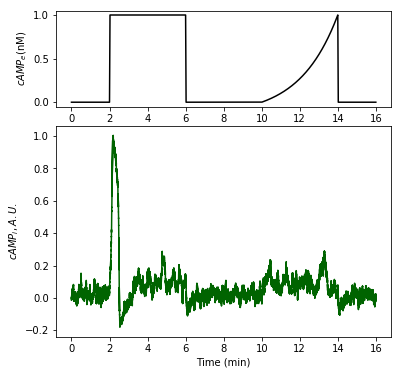

In [17]:
[t_plot_Sgro, A_trace_plot,R_trace_orig] = Sgro2015_SC(SgroAgentParam,dt,t,RampInput_Sgro)
t_plot_Sgro = t_plot_Sgro/(Nt_Sgro)

# Normalize height of cAMPi response trace to 1
A_trace_plot = A_trace_plot/Nh_Sgro
plot_SC_step_ramp(t_plot_Sgro, RampInput_Sgro, A_trace_plot)


### 7. Kamino 2017
#### Set up parameters

In [18]:
tau=1.5; n=2; K=4; kt=2; delta=0.01
gamma=3 # cAMPe dilution/degradation rate 
rho= 0.01 # population density, doesn't matter for single cells
KaminoAgentParam={'tau':tau,'n':n,'K':K,'kt':kt,'delta':delta,\
               'gamma':gamma,'rho':rho}

#### Define step input trace

In [19]:
cAMP=1
T_tot = 16 * Nt_Kamino
dt=0.001; t=list(np.arange(0,T_tot,dt))

Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]# np.linspace(0,20,num=1000) # t step 0.02
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Kamino
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = RampInput_Exp[~np.isnan(RampInput_Exp)]

Kamino_time = np.arange(0,16*Nt_Kamino,dt)
RampInput_Kamino= cAMP*np.interp(Kamino_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

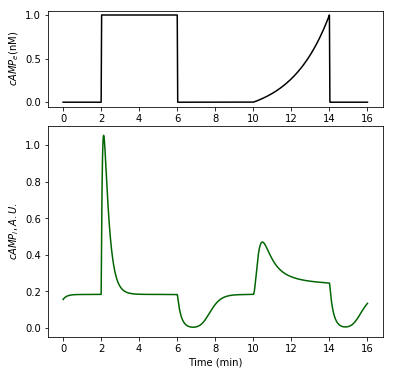

In [20]:
[t_plot_Kamino, y_trace, x_trace] = Kamino2017_SC(KaminoAgentParam,dt,t,RampInput_Kamino)
t_plot_Kamino = t_plot_Kamino/Nt_Kamino

# Normalize height of cAMPi response trace to 1
y_trace = y_trace/Nh_Kamino
plot_SC_step_ramp(t_plot_Kamino, RampInput_Kamino, y_trace)
